In [2]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('Online Retail.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


### Remove all data where customerID is null

In [5]:
df = df.dropna(subset = ["CustomerID"])

In [6]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01/12/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01/12/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01/12/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01/12/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01/12/10 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,09/12/11 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,09/12/11 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,09/12/11 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,09/12/11 12:50,4.15,12680.0,France


In [7]:
df.keys()

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [9]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01/12/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01/12/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01/12/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01/12/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01/12/10 8:26,3.39,17850.0,United Kingdom


### RFM - Recency, Frequency and Monetary

In [14]:
df.loc[df["Quantity"] > 0].shape

(397924, 8)

In [16]:
df.shape

(406829, 8)

In [17]:
df = df.loc[df["Quantity"] > 0]

In [20]:
price = df["Quantity"] * df["UnitPrice"] 

In [22]:
price.values

array([15.3 , 20.34, 22.  , ..., 16.6 , 14.85,   nan])

In [24]:
df["Sales"] = (df["Quantity"] * df["UnitPrice"]).values

<ipython-input-24-c07fff259d2b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Sales"] = (df["Quantity"] * df["UnitPrice"]).values


In [25]:
df.Sales

0         15.30
1         20.34
2         22.00
3         20.34
4         20.34
          ...  
541905    12.60
541906    16.60
541907    16.60
541908    14.85
Sales       NaN
Name: Sales, Length: 397925, dtype: float64

In [26]:
### Convert InvoiceDate from object type to date type

In [27]:
df.InvoiceDate = pd.to_datetime(df.InvoiceDate)

C:\Users\Dell\anaconda3\lib\site-packages\pandas\core\generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 397925 entries, 0 to Sales
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    397924 non-null  object        
 1   StockCode    397924 non-null  object        
 2   Description  397924 non-null  object        
 3   Quantity     397924 non-null  float64       
 4   InvoiceDate  397924 non-null  datetime64[ns]
 5   UnitPrice    397924 non-null  float64       
 6   CustomerID   397924 non-null  float64       
 7   Country      397924 non-null  object        
 8   Sales        397924 non-null  float64       
dtypes: datetime64[ns](1), float64(4), object(4)
memory usage: 40.4+ MB


In [31]:
df.InvoiceDate[0] - df.InvoiceDate[10] 

Timedelta('-1 days +23:52:00')

### 1.Monetary

In [33]:
df.shape

(397925, 9)

In [34]:
df.CustomerID.nunique()

4339

In [35]:
Monetary = df.groupby('CustomerID').Sales.sum()

In [38]:
Monetary = Monetary.reset_index()

In [39]:
Monetary

,CustomerID,Sales
0,12346.0,77183.60
1,12347.0,4310.00
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40
...,...,...
4334,18280.0,180.60
4335,18281.0,80.82
4336,18282.0,178.05
4337,18283.0,2094.88


### 2.Frequency

In [50]:
Frequency = df.groupby('CustomerID').InvoiceNo.count()

In [51]:
Frequency = Frequency.reset_index()

In [52]:
Frequency

,CustomerID,InvoiceNo
0,12346.0,1
1,12347.0,182
2,12348.0,31
3,12349.0,73
4,12350.0,17
...,...,...
4334,18280.0,10
4335,18281.0,7
4336,18282.0,12
4337,18283.0,756


### 3.Recency

In [53]:
max(df.InvoiceDate)

Timestamp('2011-12-10 17:19:00')

In [56]:
##add 1 day to the most recent datte so that easier to subtract from the dates

In [57]:
MaxDate = max(df.InvoiceDate) + pd.DateOffset(days = 1)

In [58]:
MaxDate

Timestamp('2011-12-11 17:19:00')

In [59]:
df["Difference"] = MaxDate - df.InvoiceDate

<ipython-input-59-41ae7d40fe53>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Difference"] = MaxDate - df.InvoiceDate


In [60]:
df.Difference

0        698 days 08:53:00
1        698 days 08:53:00
2        698 days 08:53:00
3        698 days 08:53:00
4        698 days 08:53:00
                ...       
541905    90 days 04:29:00
541906    90 days 04:29:00
541907    90 days 04:29:00
541908    90 days 04:29:00
Sales                  NaT
Name: Difference, Length: 397925, dtype: timedelta64[ns]

In [63]:
recency = df.groupby("CustomerID").Difference.min()

In [65]:
recency = recency.reset_index()

In [66]:
recency

,CustomerID,Difference
0,12346.0,327 days 07:18:00
1,12347.0,41 days 04:54:00
2,12348.0,77 days 04:06:00
3,12349.0,20 days 07:28:00
4,12350.0,312 days 01:18:00
...,...,...
4334,18280.0,161 days 07:27:00
4335,18281.0,5 days 06:26:00
4336,18282.0,217 days 03:44:00
4337,18283.0,11 days 04:20:00


In [67]:
recency.Difference = recency.Difference.dt.days
##dt stands fot date-time and we are looking for just the dates not time

In [68]:
recency

,CustomerID,Difference
0,12346.0,327
1,12347.0,41
2,12348.0,77
3,12349.0,20
4,12350.0,312
...,...,...
4334,18280.0,161
4335,18281.0,5
4336,18282.0,217
4337,18283.0,11


In [69]:
##merge all the values and create one dataframe

In [70]:
MF = Monetary.merge(Frequency,on = "CustomerID")

In [71]:
MF

,CustomerID,Sales,InvoiceNo
0,12346.0,77183.60,1
1,12347.0,4310.00,182
2,12348.0,1797.24,31
3,12349.0,1757.55,73
4,12350.0,334.40,17
...,...,...,...
4334,18280.0,180.60,10
4335,18281.0,80.82,7
4336,18282.0,178.05,12
4337,18283.0,2094.88,756


In [72]:
RMF = MF.merge(recency,on = "CustomerID")

In [73]:
RMF

,CustomerID,Sales,InvoiceNo,Difference
0,12346.0,77183.60,1,327
1,12347.0,4310.00,182,41
2,12348.0,1797.24,31,77
3,12349.0,1757.55,73,20
4,12350.0,334.40,17,312
...,...,...,...,...
4334,18280.0,180.60,10,161
4335,18281.0,80.82,7,5
4336,18282.0,178.05,12,217
4337,18283.0,2094.88,756,11


In [74]:
RMF.columns = ["CustomerID","TotalSales","Frequency","Recency"]

In [75]:
RMF

,CustomerID,TotalSales,Frequency,Recency
0,12346.0,77183.60,1,327
1,12347.0,4310.00,182,41
2,12348.0,1797.24,31,77
3,12349.0,1757.55,73,20
4,12350.0,334.40,17,312
...,...,...,...,...
4334,18280.0,180.60,10,161
4335,18281.0,80.82,7,5
4336,18282.0,178.05,12,217
4337,18283.0,2094.88,756,11


## Clustering Concept to identify Potential Customers

In [89]:
##Apply Feature Scaling on Columns

In [90]:
from sklearn.preprocessing import StandardScaler

In [91]:
scale = StandardScaler()

In [92]:
RMF_New = scale.fit_transform(RMF)

In [93]:
RMF_New

array([[-1.71571803e+00,  8.35963391e+00, -3.96512139e-01,
         1.91695604e+00],
       [-1.71513721e+00,  2.51046358e-01,  3.94687670e-01,
        -5.68647438e-01],
       [-1.71455638e+00, -2.85464504e-02, -2.65374049e-01,
        -2.55774273e-01],
       ...,
       [ 1.73205446e+00, -2.08712435e-01, -3.48428173e-01,
         9.60954701e-01],
       [ 1.73263529e+00,  4.57171586e-03,  2.90379646e+00,
        -8.29375075e-01],
       [ 1.73495859e+00, -2.40912314e-02, -9.48945321e-02,
        -9.16284288e-01]])

## Apply K-Means with Some K

In [94]:
from sklearn.cluster import KMeans

In [110]:
#Elbow Method
SSD = []
K = []
for i in range(2,15):
    model = KMeans(n_clusters = i)
    model.fit(RMF_New)
    SSD.append(model.inertia_)
    K.append(i)

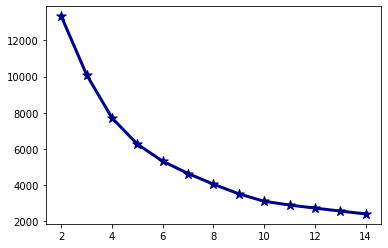

In [128]:
plt.plot(K,SSD,c= "darkblue",lw = 3)
plt.scatter(K,SSD,marker = "*",color = "darkblue",s = 100)
plt.show()

In [129]:
## From the plt, K=5

In [130]:
model = KMeans(n_clusters = 5)
clusterID = model.fit_predict(RMF_New)

In [131]:
RMF["ClusterID"] = clusterID

In [132]:
RMF.ClusterID.unique()

array([0, 2, 4, 3, 1])

In [134]:
RMF

,CustomerID,TotalSales,Frequency,Recency,ClusterID
0,12346.0,77183.60,1,327,0
1,12347.0,4310.00,182,41,0
2,12348.0,1797.24,31,77,0
3,12349.0,1757.55,73,20,0
4,12350.0,334.40,17,312,2
...,...,...,...,...,...
4334,18280.0,180.60,10,161,1
4335,18281.0,80.82,7,5,1
4336,18282.0,178.05,12,217,1
4337,18283.0,2094.88,756,11,1


In [135]:
RMF.head()

,CustomerID,TotalSales,Frequency,Recency,ClusterID
0,12346.0,77183.60,1,327,0
1,12347.0,4310.00,182,41,0
2,12348.0,1797.24,31,77,0
3,12349.0,1757.55,73,20,0
4,12350.0,334.40,17,312,2


In [143]:
All_Sales = RMF.groupby("ClusterID").TotalSales.mean()
All_Freq = RMF.groupby("ClusterID").Frequency.mean()
All_Recency = RMF.groupby("ClusterID").Recency.mean()

In [144]:
final_data = pd.DataFrame({
    "Sales" : All_Sales,
    "Frequency" : All_Freq,
    "Recency" : All_Recency
})

In [145]:
final_data

,Sales,Frequency,Recency
ClusterID,,,
0,2217.498982,101.067583,61.620848
1,1868.969874,98.491309,59.561414
2,449.160747,27.148191,293.173862
3,70925.287500,5807.750000,5.000000
4,190863.461667,827.833333,22.833333


In [146]:
##Plot Pie Plot all data

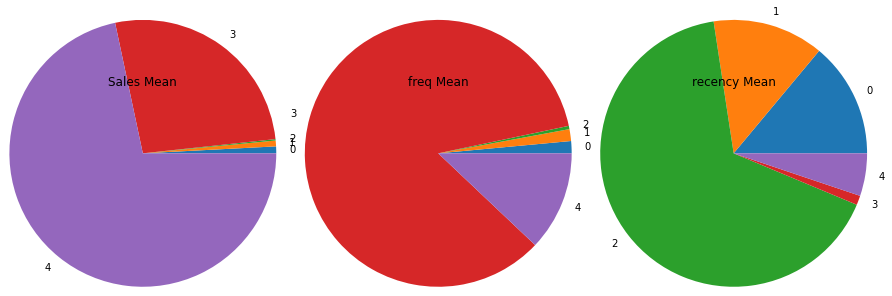

In [151]:
fig = plt.figure(figsize = (15,5))

ax = fig.add_subplot(2,3,1)
plt.title("Sales Mean")
ax.pie(final_data.Sales,labels = [0,1,2,3,4],radius = 2.7)

ax = fig.add_subplot(2,3,2)
plt.title("freq Mean")
ax.pie(final_data.Frequency,labels = [0,1,2,3,4],radius = 2.7)

ax = fig.add_subplot(2,3,3)
plt.title("recency Mean")
ax.pie(final_data.Recency,labels = [0,1,2,3,4],radius = 2.7)

plt.show()